# Problem Statement

Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
Airlines = pd.read_excel("Airlines+Data.xlsx")

In [3]:
Airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
Airlines.shape

(96, 2)

In [5]:
Airlines.size

192

In [6]:
Airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
#Checking for null values
Airlines.isnull()

,Month,Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
91,False,False
92,False,False
93,False,False
94,False,False


In [9]:
Airlines.isnull().any()

Month         False
Passengers    False
dtype: bool

In [10]:
Airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

<b>There are no Null Values.</b>

In [14]:
#Checking Duplicate values.
Airlines.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

In [15]:
Airlines.duplicated().sum()

0

In [16]:
Airlines[Airlines.duplicated()]

,Month,Passengers


<b>No Duplicate Values</b>

In [17]:
#Unique values
Airlines.nunique()

Month         96
Passengers    80
dtype: int64

In [20]:
df = Airlines.copy()
df.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

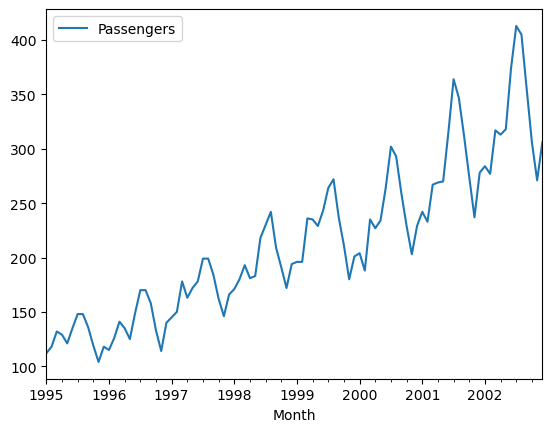

In [21]:
df.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

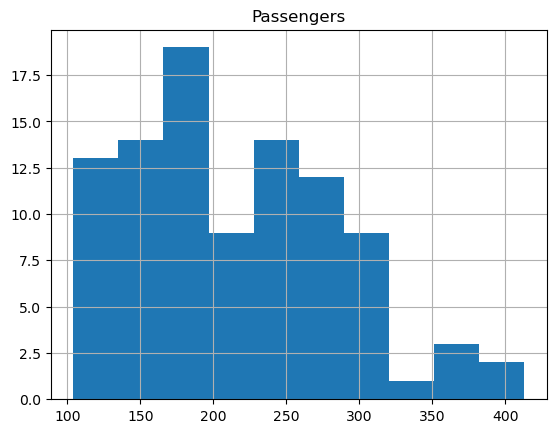

In [22]:
df.hist()

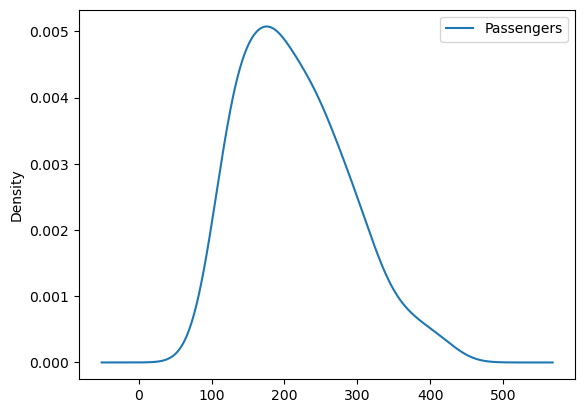

In [24]:
df.plot(kind='kde')
plt.show()

In [25]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

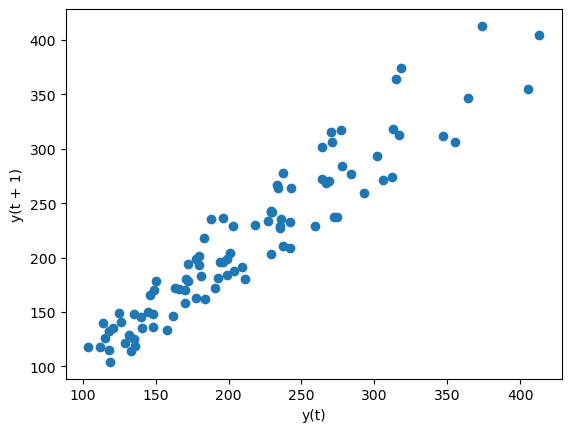

In [26]:
#lag plot
lag_plot(df)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

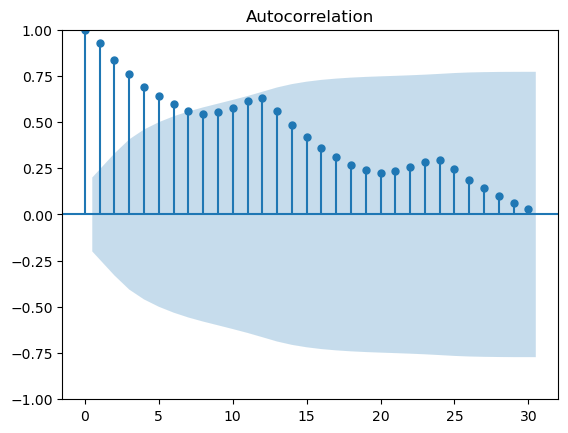

In [31]:
plot_acf(df,lags=30)
plt.show()

# Upsampling

In [41]:
upsampled = df.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


In [48]:
interpolated = umsampled.interpolate(method='linear')
print(interpolated.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30       178.0
1997-07-31       199.0
1997-08-31       199.0


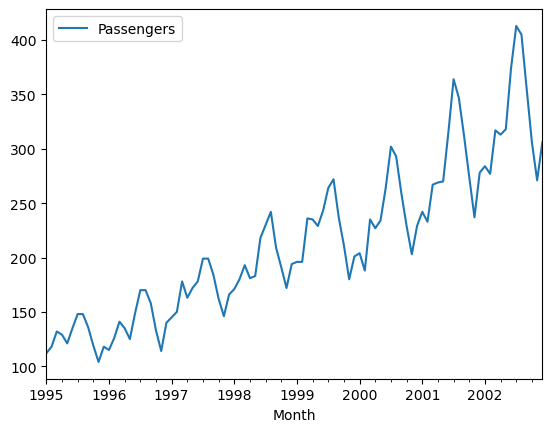

In [49]:
interpolated.plot()
plt.show()

In [50]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


# Transformations

<AxesSubplot:xlabel='Month'>

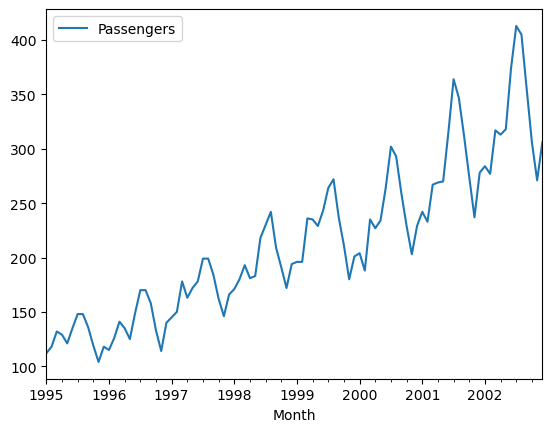

In [51]:
df.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

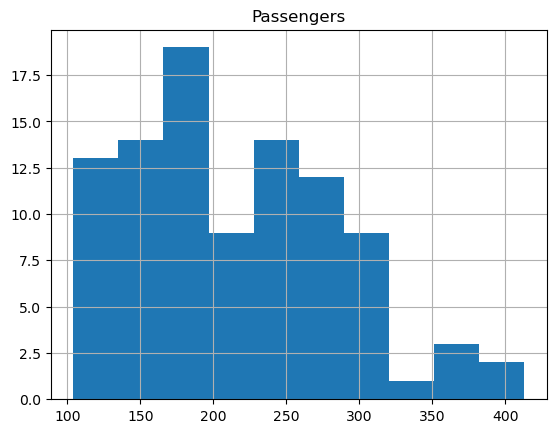

In [52]:
df.hist()

# Square Root Transformation

In [55]:
from numpy import sqrt

In [56]:
dataframe = pd.DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

<AxesSubplot:>

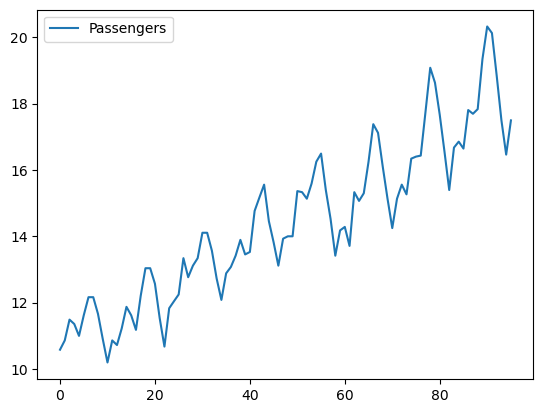

In [57]:
dataframe.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

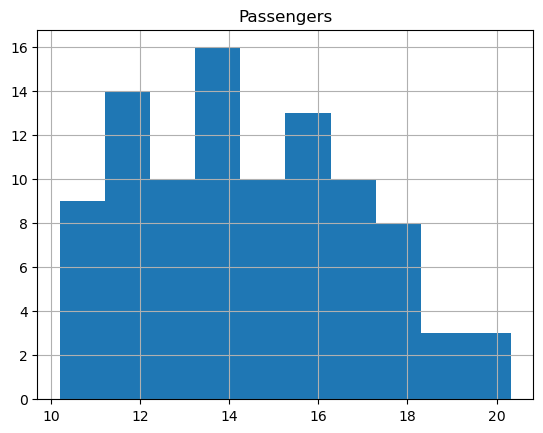

In [61]:
dataframe.hist()

# Log Transformation

In [62]:
from numpy import log

In [63]:
dataframe = pd.DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

<AxesSubplot:>

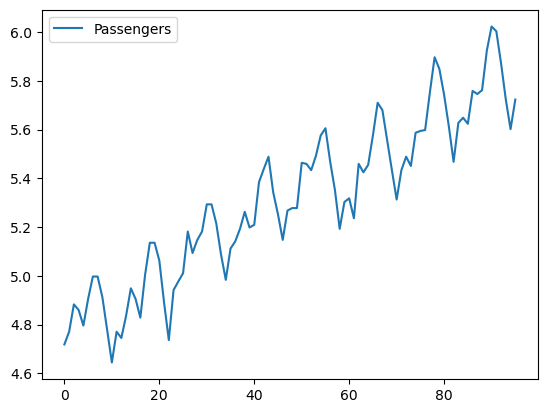

In [64]:
dataframe.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

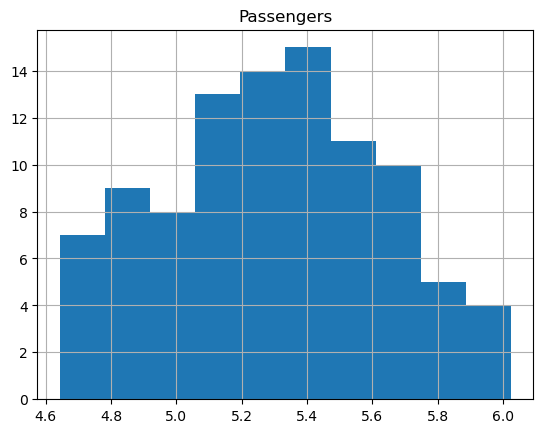

In [65]:
dataframe.hist()

# Exponential Transformation

In [66]:
from numpy import exp

In [67]:
dataframe = pd.DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = exp(dataframe['Passengers'])

<AxesSubplot:>

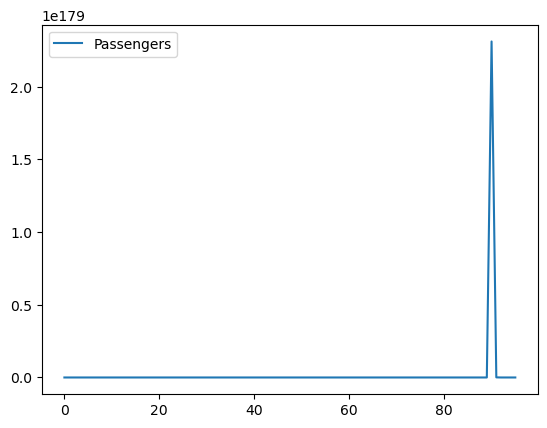

In [68]:
dataframe.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

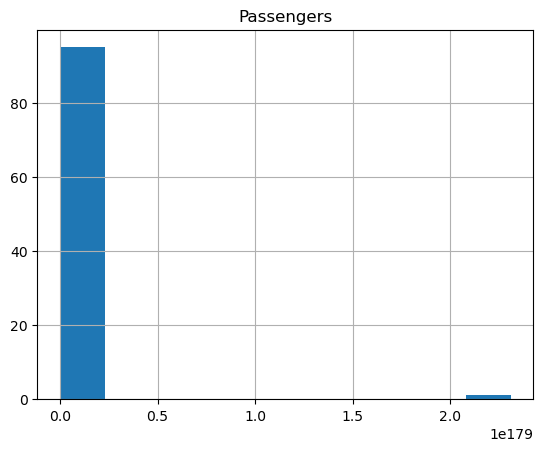

In [69]:
dataframe.hist()

In [70]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

# Moving Average

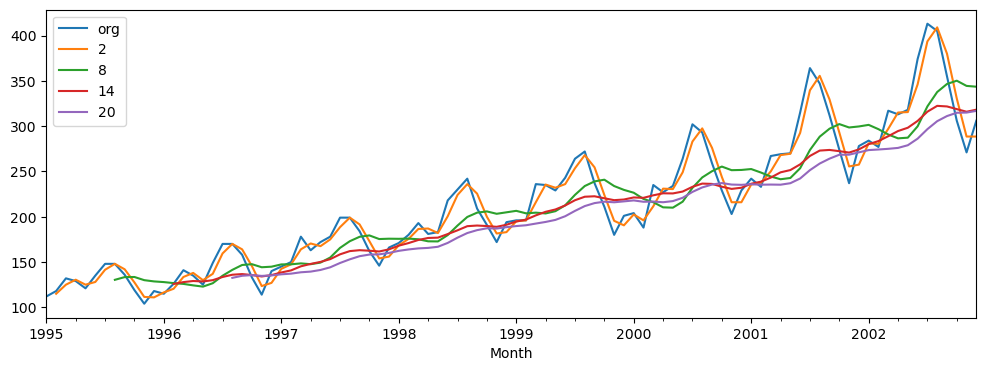

In [71]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label='org')
for i in range(2, 24, 6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

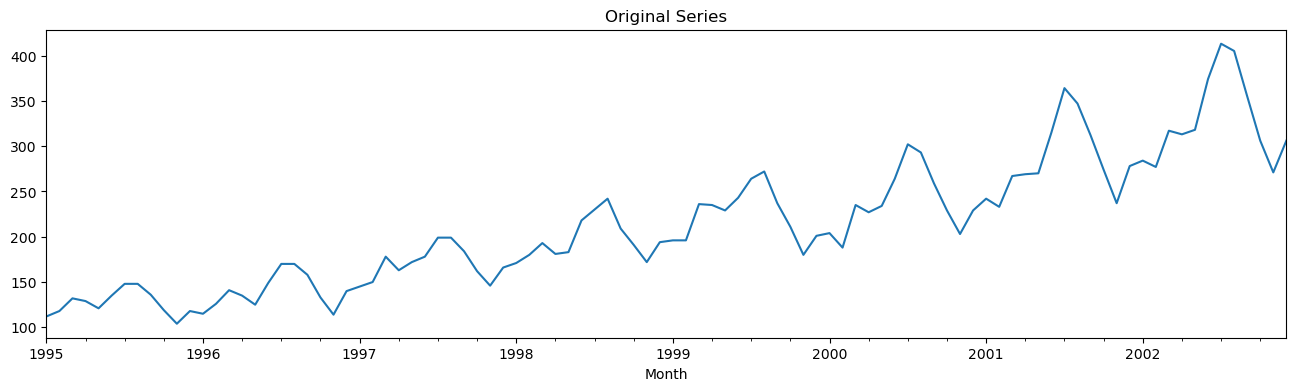

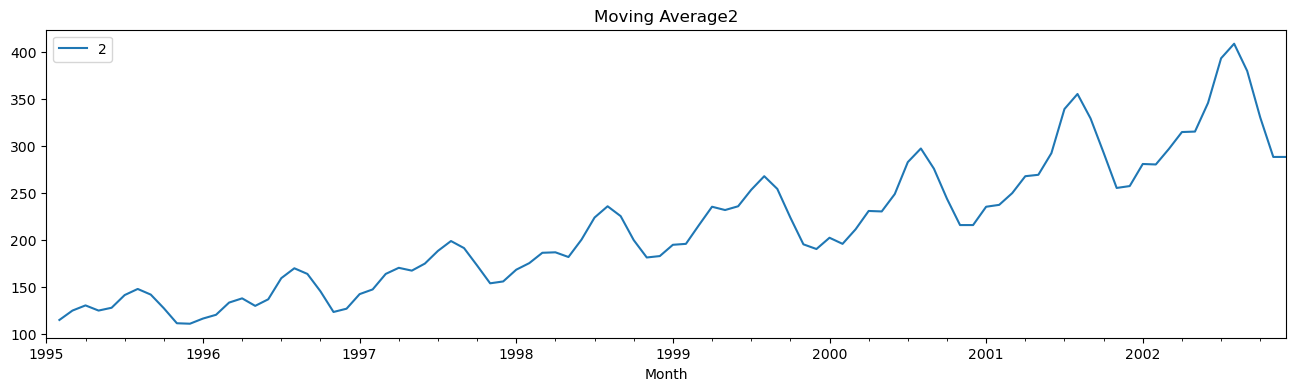

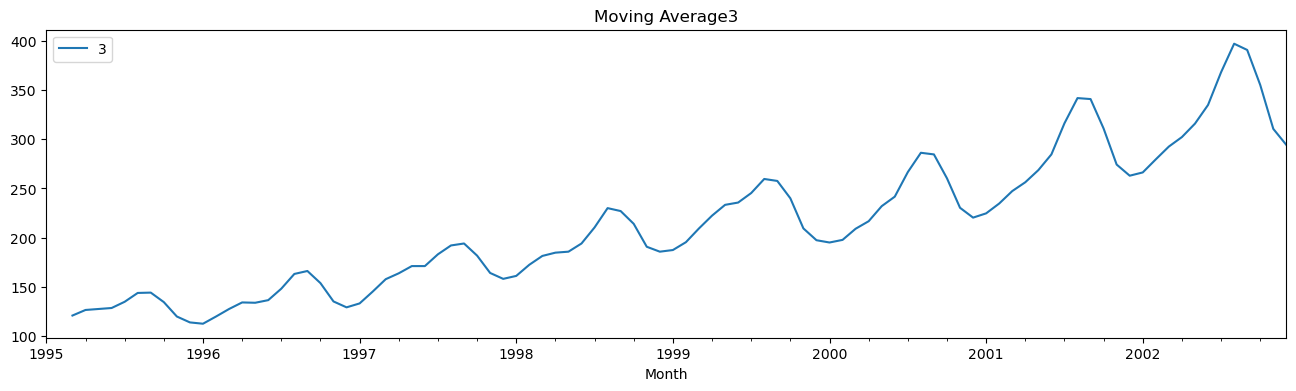

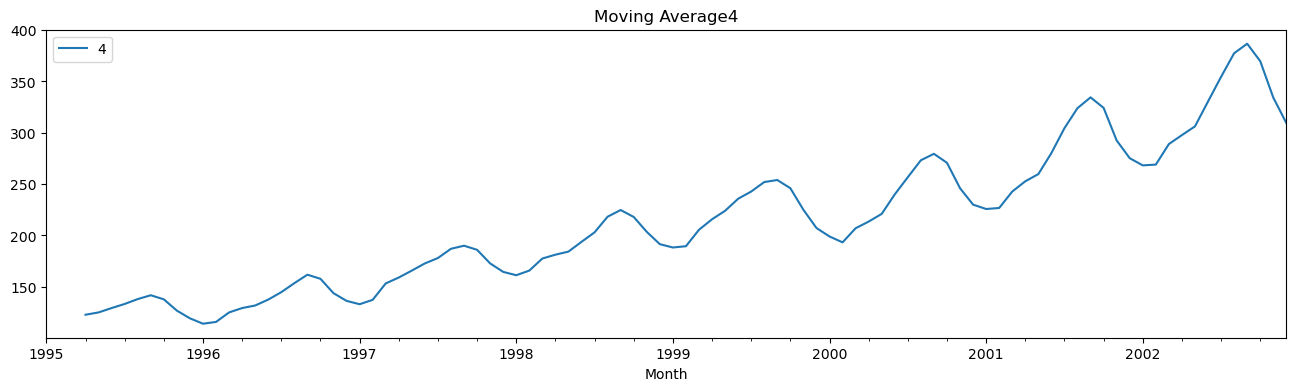

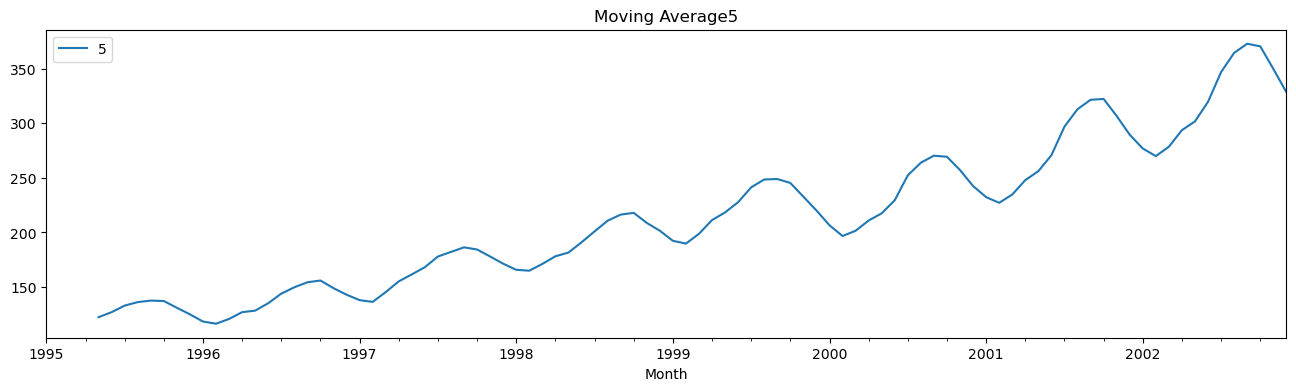

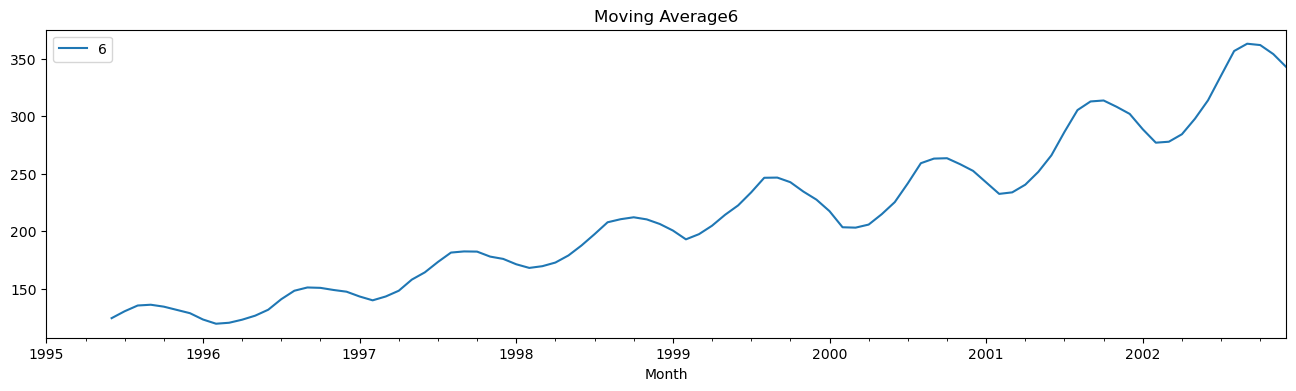

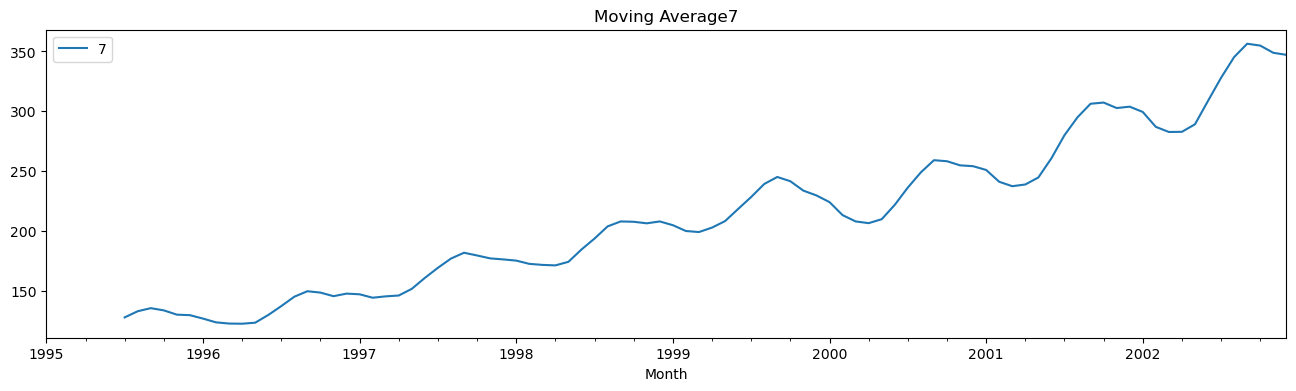

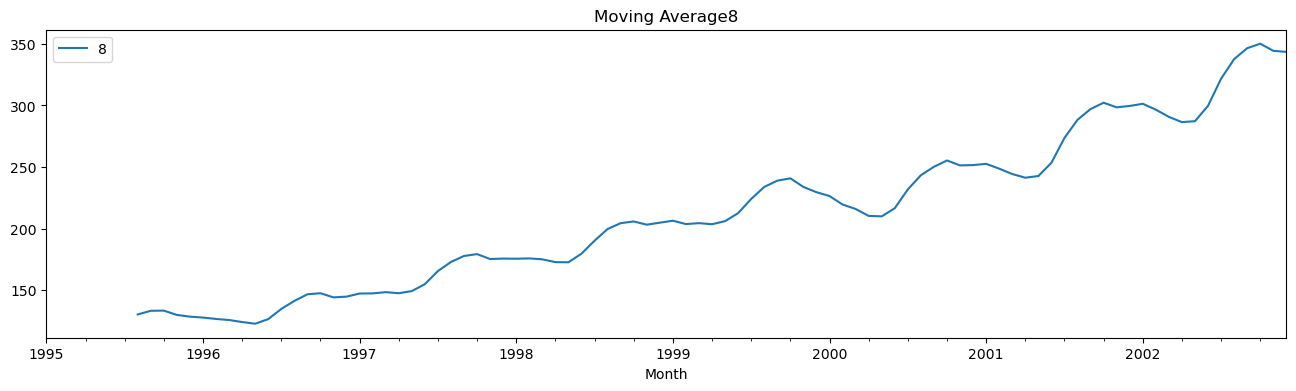

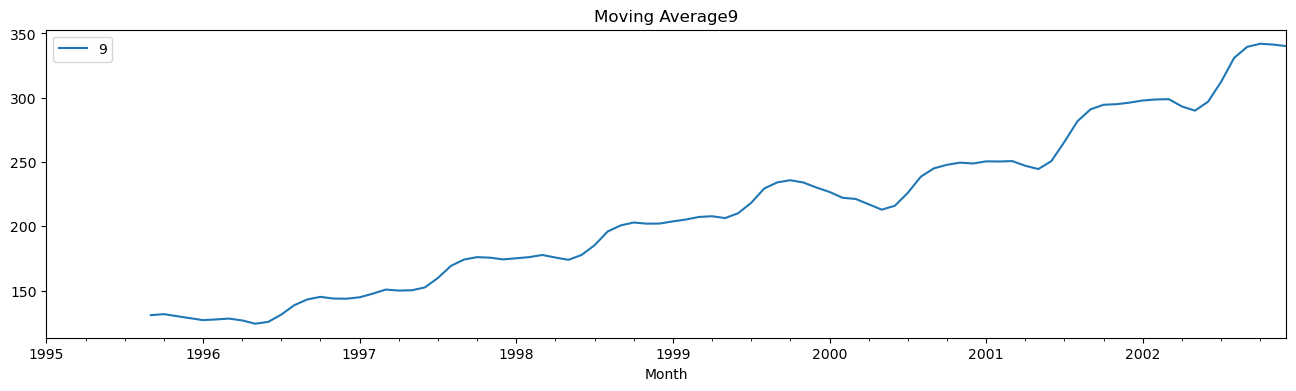

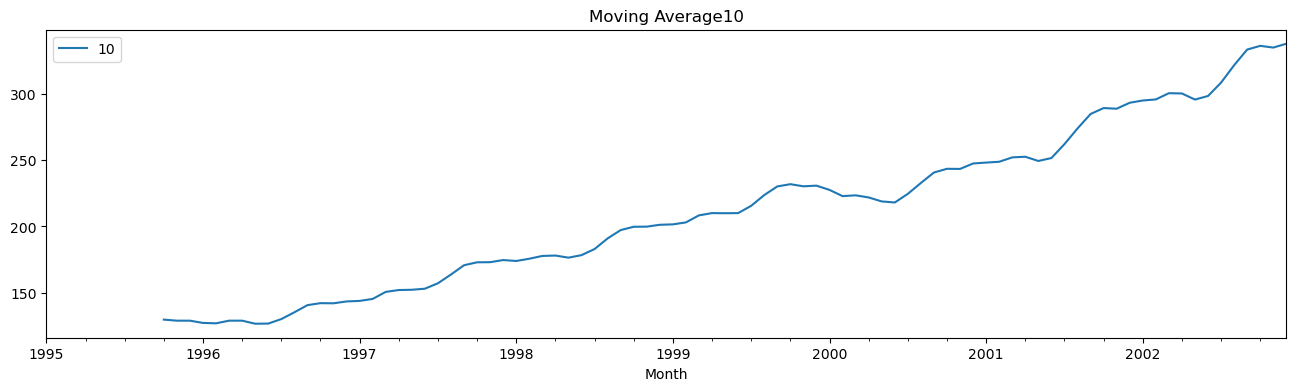

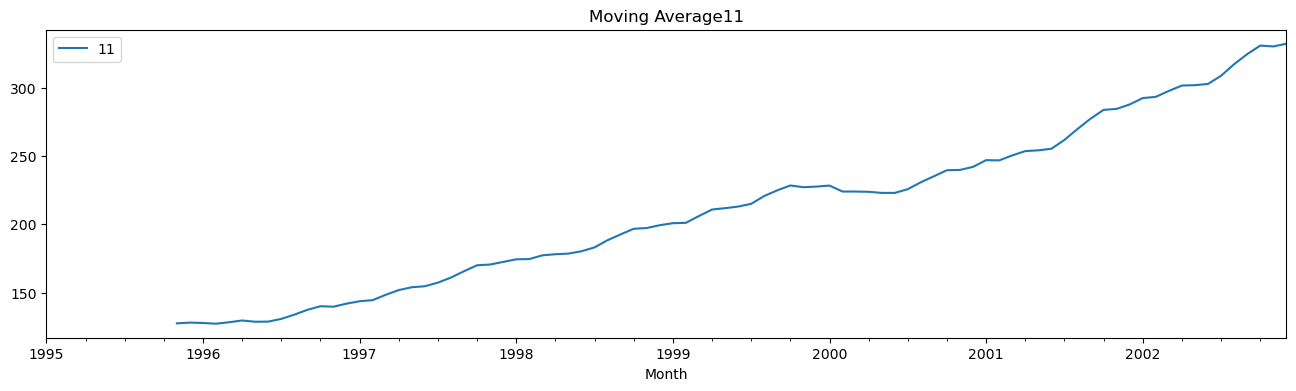

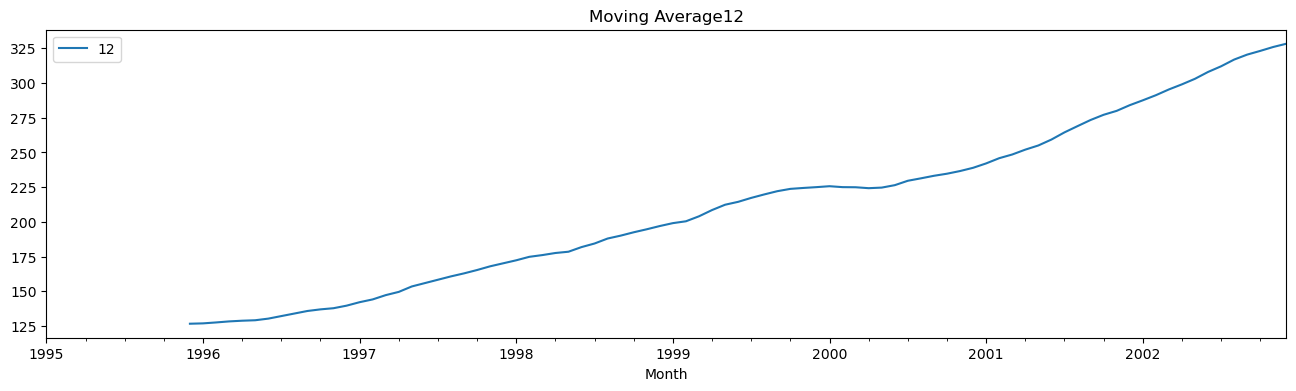

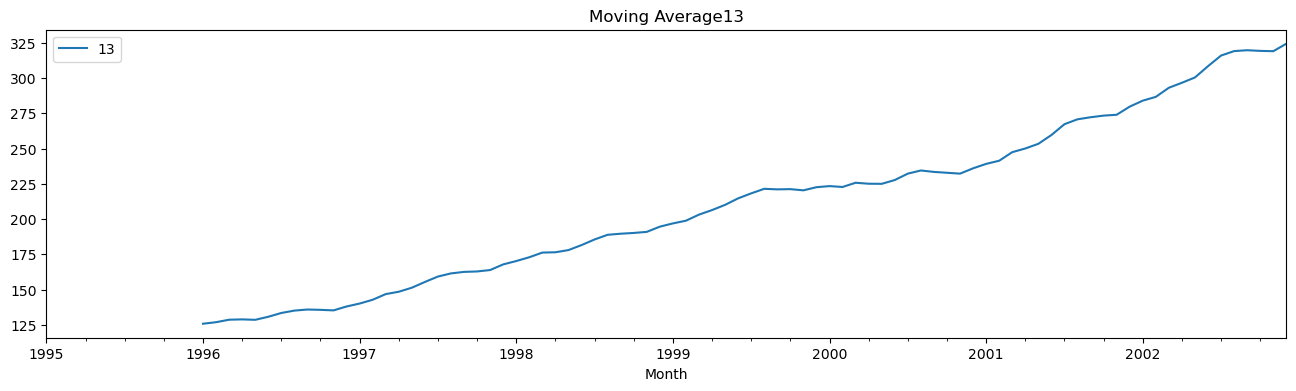

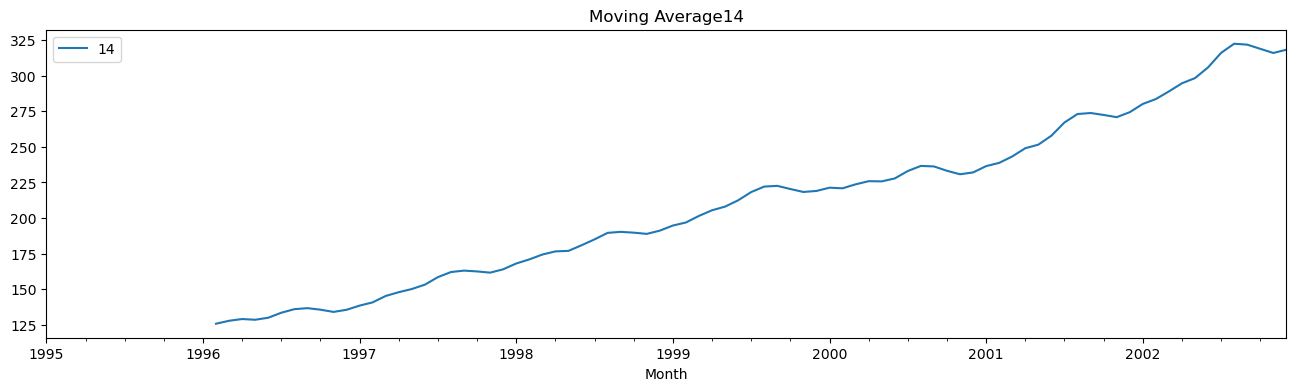

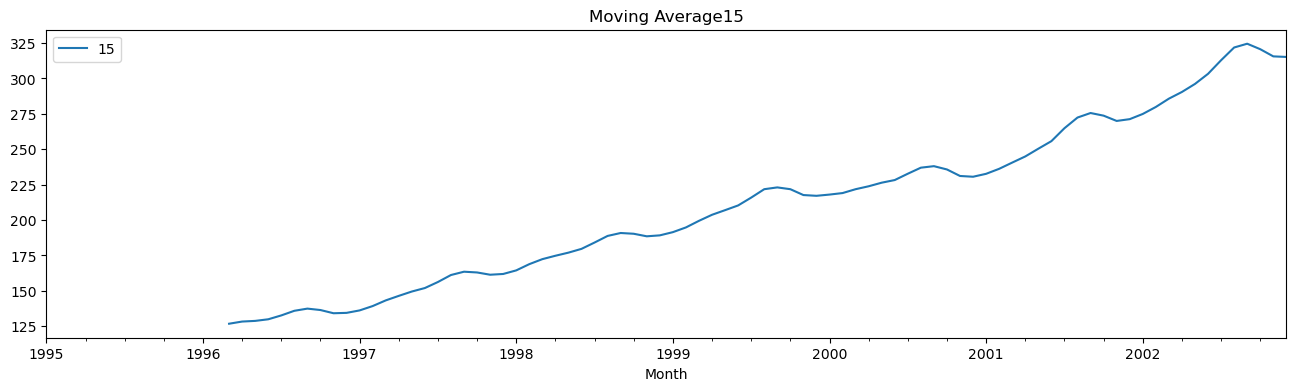

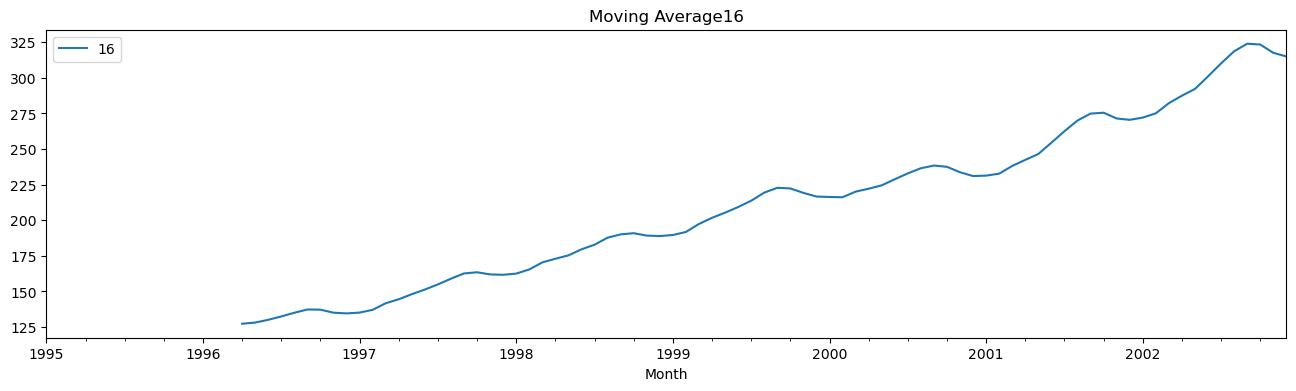

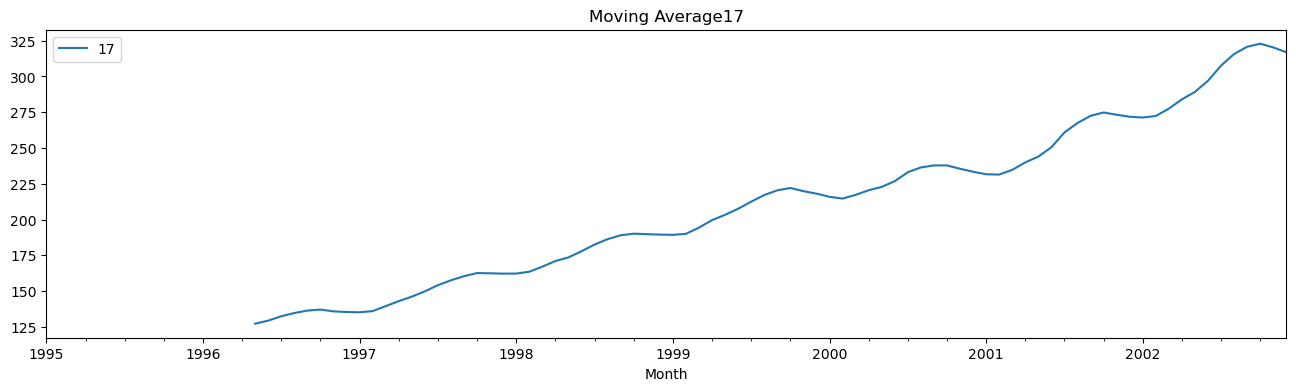

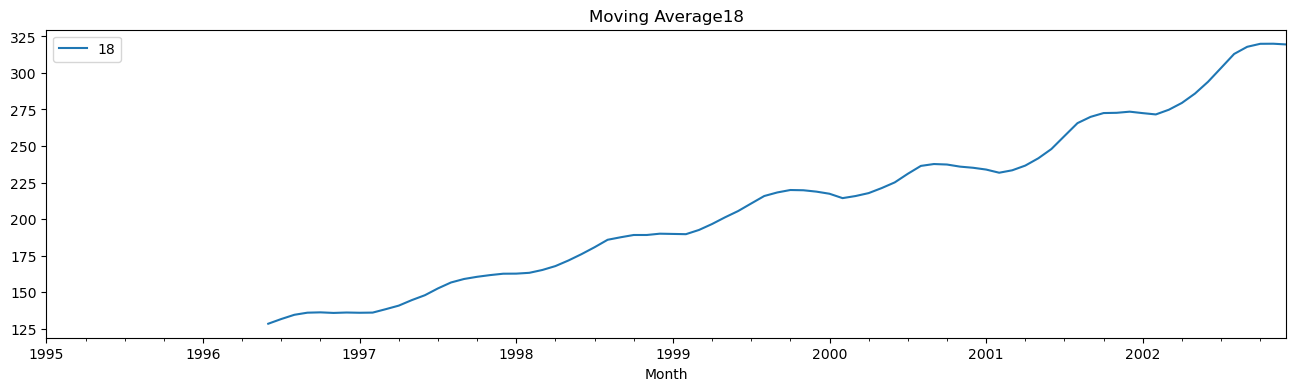

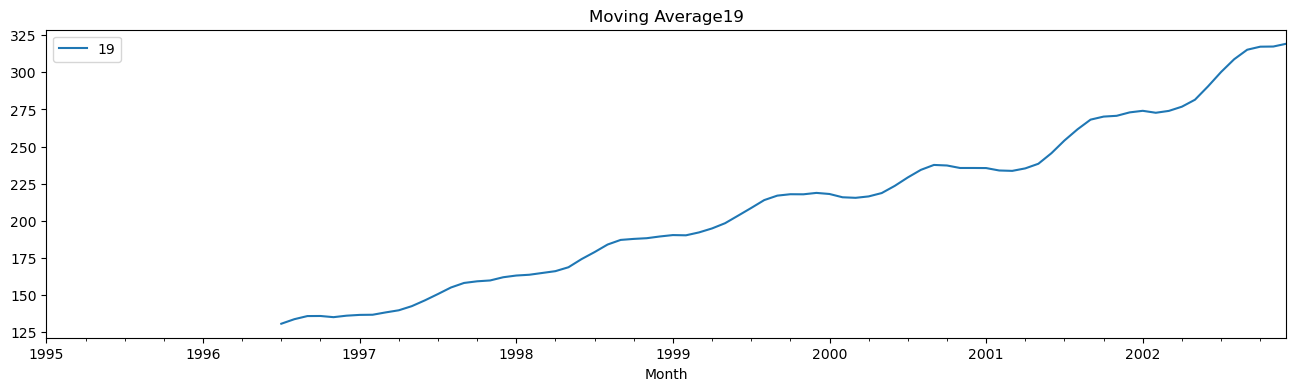

In [73]:
plt.figure(figsize=(16,4))
interpolated.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,20):
    plt.figure(figsize=(16,4))
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average"+str(i))
    plt.legend(loc='best')
    plt.show()

# Time Series Decomposition Plot

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

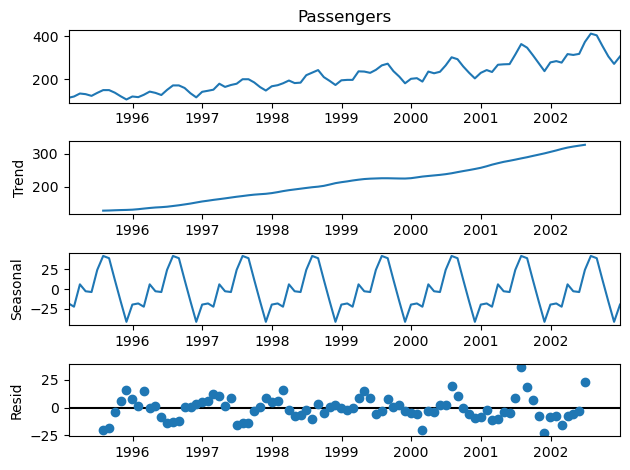

In [79]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers)
decompose_ts_add.plot()
plt.show()

# ACF and PACF Plots

In [81]:
import statsmodels.graphics.tsaplots as tsa_plots

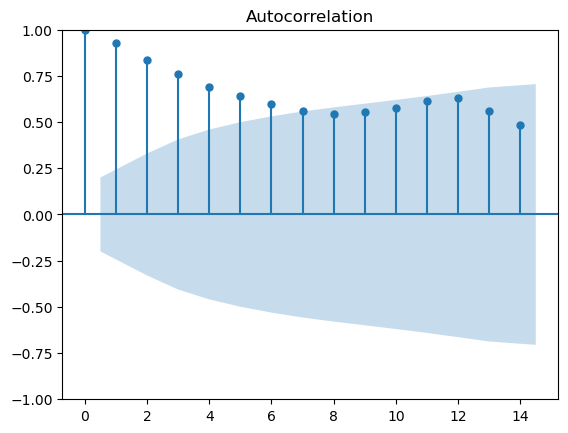

In [86]:
tsa_plots.plot_acf(interpolated.Passengers, lags=14)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


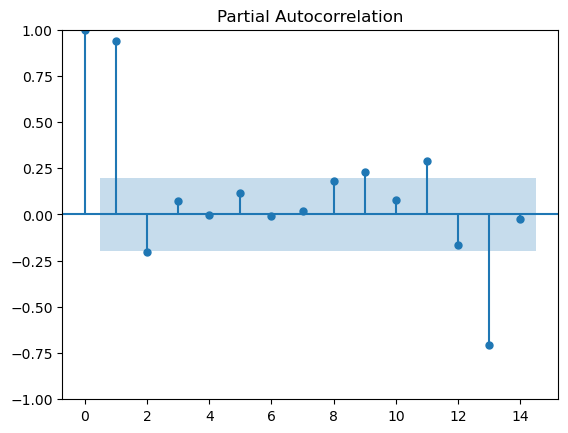

In [87]:
tsa_plots.plot_pacf(interpolated.Passengers, lags=14)
plt.show()

# Evaluation Metric MAPE

In [90]:
def Mape(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [103]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [93]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_ses,Test.Passengers)

11.894852596201785

In [109]:
rmse_ses = sqrt(mean_squared_error(pred_ses,Test.Passengers))
rmse_ses

52.815879784201954

# Holt Method

In [94]:
from statsmodels.tsa.holtwinters import Holt

In [96]:
h_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_trend=0.2)
pred_h = h_model.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h,Test.Passengers)

15.911730030957553

In [108]:
rmse_h = sqrt(mean_squared_error(pred_h,Test.Passengers))
rmse_h

55.10074245343832

# Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
h_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_add_add = h_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_add_add,Test.Passengers)

3.5048172508145945

In [107]:
rmse_h_add_add = sqrt(mean_squared_error(pred_h_add_add,Test.Passengers))
rmse_h_add_add

14.13221972998609

# Holt Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [100]:
h_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_mul_add = h_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_mul_add,Test.Passengers)

2.400532127002706

In [106]:
rmse_h_mul_add = sqrt(mean_squared_error(pred_h_mul_add,Test.Passengers))
rmse_h_mul_add

10.235197259187517

# Holt Winter Exponential Smoothing with Additive Seasonality and Multiplicative Trend

In [101]:
h_model_add_mul = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_add_mul = h_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_add_mul,Test.Passengers)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


4.495903759727125

In [105]:
rmse_h_add_mul = sqrt(mean_squared_error(pred_h_add_mul,Test.Passengers))
rmse_h_add_mul

17.903490138270673

# Holt Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend

In [102]:
h_model_mul_mul = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_h_mul_mul = h_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
Mape(pred_h_mul_mul,Test.Passengers)

D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


2.77430337295738

In [104]:
rmse_h_mul_mul = sqrt(mean_squared_error(pred_h_mul_mul,Test.Passengers))
rmse_h_mul_mul

10.64724594005567

# Final Model by combining Train and Test

In [110]:
h_model_mul_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="mul",trend="add",seasonal_periods=10).fit()

In [111]:
#Forecasting for next 10 time periods
h_model_mul_add.forecast(10)

2003-01-31    317.077238
2003-02-28    323.538543
2003-03-31    328.628590
2003-04-30    332.340272
2003-05-31    336.850708
2003-06-30    332.216796
2003-07-31    319.368088
2003-08-31    316.241725
2003-09-30    314.807614
2003-10-31    327.584105
Freq: M, dtype: float64

In [112]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


In [113]:
interpolated.reset_index(inplace=True)

In [115]:
interpolated['t'] = 1

In [117]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_12884\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


In [118]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94
94,2002-11-30,271.0,95


In [119]:
# inserting t_sq column with values
interpolated['t_sq'] = (interpolated['t'])**2

In [120]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # year extraction

In [122]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002
94,2002-11-30,271.0,95,9025,Nov,2002


In [123]:
months= pd.get_dummies(interpolated['month'])

In [124]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [125]:
Air = pd.concat([interpolated, months], axis=1)

In [128]:
Air.head()

,Month,Passengers,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-31,112.0,1,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [129]:
Air['log_Passengers'] = np.log(Air['Passengers'])
Air.head()

,Month,Passengers,t,t_sq,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_Passengers
0,1995-01-31,112.0,1,1,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791


<AxesSubplot:xlabel='month', ylabel='year'>

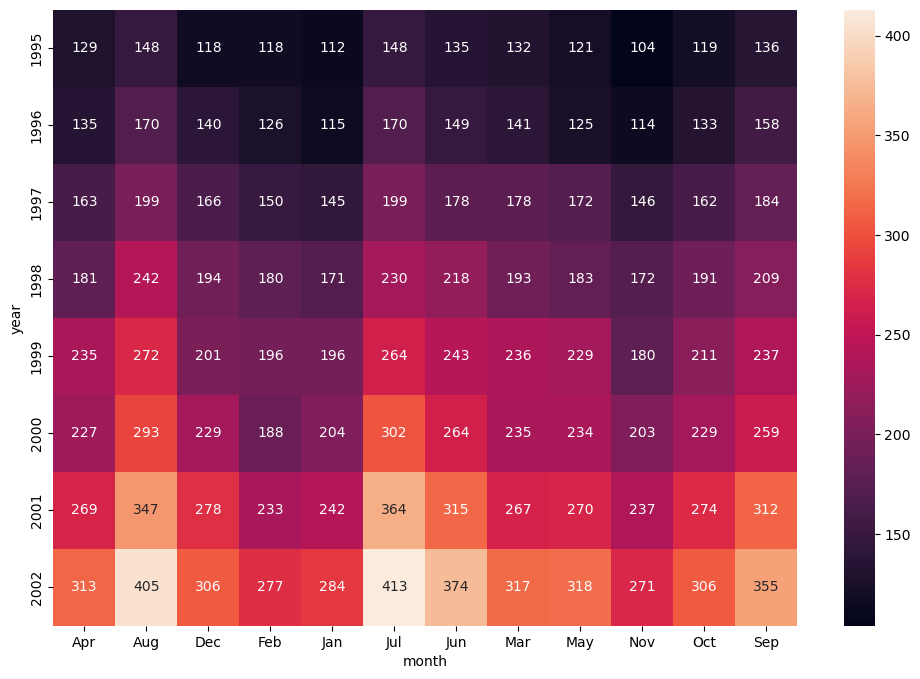

In [131]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

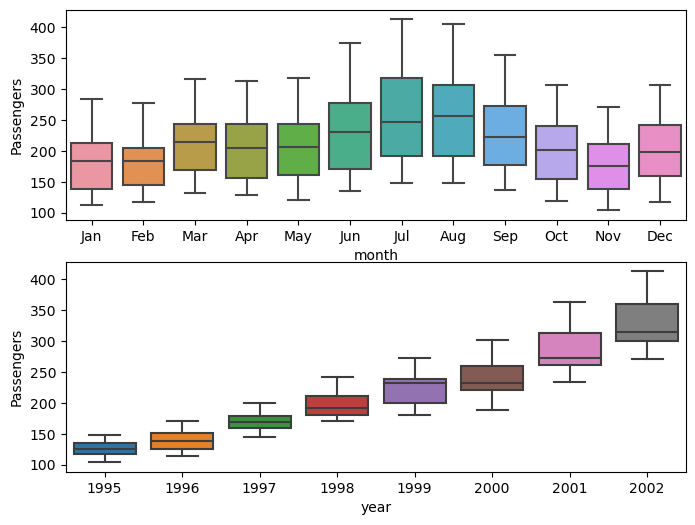

In [133]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

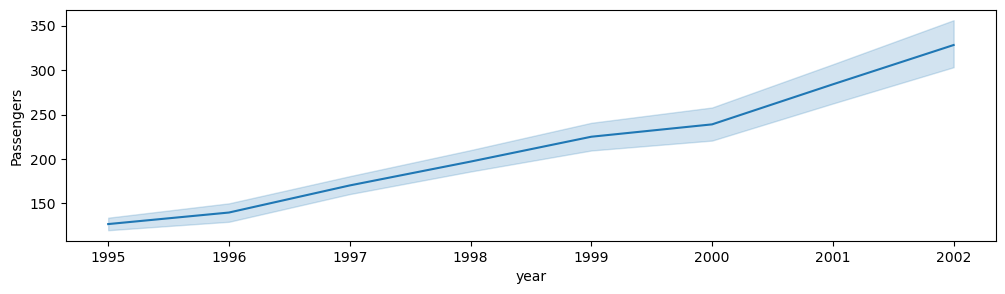

In [135]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Air)

# Splitting Data

In [136]:
Train = Air.head(81) 
Test = Air.tail(14) 

In [137]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.483798835203736

In [139]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.29168664671026

In [140]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.23045842456939

In [141]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.7381356567333

In [142]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.086861078008006

In [144]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.18855105847445

In [145]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.91485878622302

In [146]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.914859
4,rmse_add_sea_quad,24.086861
2,rmse_Quad,46.230458
1,rmse_Exp,46.291687
0,rmse_linear,49.483799
3,rmse_add_sea,130.738136
5,rmse_Mult_sea,137.188551


# rmse_multi_add_sea is the lowest meaning Model Mul_Add_sea will be prefered than any other in this analysis.